# One-dimensional Statistics

For a sample of points $x_1, x_2, \dots, x_N \in \mathbb{R}$ define the mean (or average) is
$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$
or, more commonly, the un-biasd mean is
$$
\bar{x} = \frac{1}{N-1} \sum_{i=1}^{N} x_i.
$$



In [81]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

In [54]:
# In python/numpy:
adults = pd.read_csv('data/adult.data',
                      header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ]
                     ) # Sigh, no headers provided


In [55]:
# get the education num and do some stats
education = adults[['education-num']].values # numpy array N x 1
education.shape

(32561, 1)

In [56]:
m = education.mean()
print(m)

10.0806793403


In [57]:
education.sum() / adults.shape[0] # divide by N

10.0806793403151

In [58]:
education.sum() / (adults.shape[0] - 1)

10.080988943488943

## Histogram

For the data points $x_1, x_2, \dots, x_N$ want to
1. Split up the range of values into "bins" - a partition of the range $[min,max]$
2. For each element of this partition, count how many of the points fall into it
3. Plot the resulting counts as a bar graph

In probabilistic terms, this represents the (unscaled) empirical pdf.

In [59]:
education.max()

16

In [60]:
education.min()

1

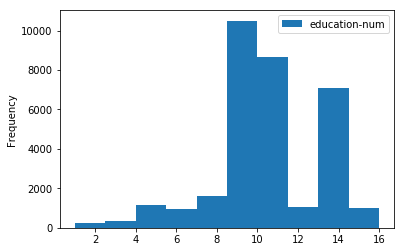

In [61]:
adults[['education-num']].plot.hist(bins=10)

In [62]:
education[education > m].shape

(10516,)

In [63]:
education[education < m].shape

(22045,)

In [64]:
np.array([1,2,3,4,5,1e20]).mean()

1.6666666666666666e+19

In [65]:
np.mean(education)

10.0806793403151

## Quantiles

Median (aka 50% quantile, aka 50th percentile, aka 2nd quartile): the value $t$ so that $N/2$ of the samples are at most $t$.

Calculate by sorting, if length is odd, check center element. If even, it is the average of the two that straddle the center.

Example: median of $[1,2,3,4,5]$ is 3. The median of $[1,2,3,4]$ is $(3+2)/2 = 2.5$.

In [74]:
median = np.percentile(education,50)

We have, for the education data, the mean is greater than the median, so skewed right.

In [76]:
education[education == 10].shape

(7291,)

In [77]:
education[education == 10].shape[0] / education.shape[0]

0.22391818433094807

In [82]:
sp.stats.mode(education)

ModeResult(mode=array([[9]]), count=array([[10501]]))

## Variance

Captures the "shape" of a dataset, by looking at how spread apart the data is from the mean.

For points $x_1, x_2, \dots, x_N$ with mean $\bar{x}$ we define variance as
$$
\sigma^2 = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})^2.
$$

Reading this in the lens of means: looking at the average squared distance from the mean, $\bar{x}$.
The *standard deviation* is $\sigma$.

In [84]:
np.var(education)

6.6186866304165175

In [85]:
np.std(education)

2.5726808256012865

In [87]:
np.sqrt(np.var(education))

2.5726808256012865